In [12]:
library(caret)

In [13]:
file <- "E:/Homework/IS/out_data/model_data/model_data.csv"
data <- read.csv(file, header = TRUE, sep = ",", stringsAsFactors = TRUE)

In [14]:
# Assuming your data is stored in a data frame called 'data'
numeric_columns <- sapply(data, is.numeric)
scaled_numeric_data <- scale(data[, numeric_columns])

df <- data
df[, numeric_columns] <- scaled_numeric_data

summary(df)

 ConvertedCompYearly
 Min.   :-1.5591    
 1st Qu.:-0.7394    
 Median :-0.2068    
 Mean   : 0.0000    
 3rd Qu.: 0.6202    
 Max.   : 2.8557    
                    
                                                                                 MainBranch   
 I am a developer by profession                                                       :37850  
 I am not primarily a developer, but I write code sometimes as part of my work/studies: 2729  
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                 Age       
 18-24 years old   : 3874  
 25-34 years old

In [15]:
df= na.omit(df)

In [16]:
set.seed(123)
trainIndex <- createDataPartition(df$ConvertedCompYearly, p = 0.7, list = FALSE)
train_data <- df[trainIndex, ]
test_data <- df[-trainIndex, ]

In [17]:
summary(train_data)

 ConvertedCompYearly
 Min.   :-1.559061  
 1st Qu.:-0.739359  
 Median :-0.206751  
 Mean   : 0.002208  
 3rd Qu.: 0.620241  
 Max.   : 2.855741  
                    
                                                                                 MainBranch   
 I am a developer by profession                                                       :26483  
 I am not primarily a developer, but I write code sometimes as part of my work/studies: 1924  
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                                                                                              
                 Age       
 18-24 years old   : 2695  
 25-34 years old

In [18]:
# Define the control parameters for train function
ctrl <- trainControl(method = "cv", number = 5, savePredictions = "final")

In [19]:
# Linear Regression Model
lm_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "lm", trControl = ctrl)

In [20]:
summary(lm_model)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.6695 -0.5954 -0.1231  0.5022  3.3731 

Coefficients:
                                                                                                          Estimate
(Intercept)                                                                                              -0.283190
`MainBranchI am not primarily a developer, but I write code sometimes as part of my work/studies`        -0.048251
`Age25-34 years old`                                                                                      0.246969
`Age35-44 years old`                                                                                      0.357158
`Age45-54 years old`                                                                                      0.238426
`Age55-64 years old`                                                                                      0.147658
`Age65 years or older`                  

In [21]:
# Forward Selection Model
forward_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "leapForward", trControl = ctrl)

In [22]:
# Backward Selection Model
backward_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "leapBackward", trControl = ctrl)

In [23]:
# Stepwise Selection Model
stepwise_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "leapSeq", trControl = ctrl)

In [24]:
# Ridge Regression
ridge_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "glmnet", trControl = ctrl, 
                     tuneGrid = expand.grid(alpha = 0, lambda = seq(0.001, 0.1, length = 10)))

In [25]:
# Lasso Regression
lasso_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "glmnet", trControl = ctrl, 
                     tuneGrid = expand.grid(alpha = 1, lambda = seq(0.001, 0.1, length = 10)))

In [26]:
# Principal Component Analysis (PCA)
pca_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "pcr", trControl = ctrl, 
                   tuneLength = 10)

In [27]:
# Decision Tree Model
dt_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "rpart", trControl = ctrl)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [28]:
# Random Forest Model
#rf_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "rf", trControl = ctrl, importance = TRUE)

In [30]:
# SVM ModelConvertedCompYearly
svm_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "svmRadial", trControl = ctrl)

In [32]:
tuneGrid <- expand.grid(k = c(25, 50, 100, 125, 250))
knn_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "knn", trControl = ctrl, preProcess = c("center", "scale"), tuneGrid = tuneGrid)

In [33]:
knnModel

k-Nearest Neighbors 

28407 samples
   38 predictor

Pre-processing: centered (92), scaled (92) 
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 22726, 22726, 22726, 22724, 22726 
Resampling results across tuning parameters:

  k    RMSE       Rsquared   MAE      
   25  0.9002737  0.1914728  0.7198913
  250  0.9047748  0.2168454  0.7286379
  400  0.9079607  0.2251330  0.7317889

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 25.

In [34]:
nnet_model <- train(ConvertedCompYearly ~ ., data = train_data, method = "nnet", trControl = ctrl)

# weights:  95
initial  value 26235.927133 
final  value 22556.624075 
converged
# weights:  283
initial  value 28235.429941 
final  value 22556.624075 
converged
# weights:  471
initial  value 24233.219972 
final  value 22556.624075 
converged
# weights:  95
initial  value 31248.062521 
iter  10 value 22625.224899
iter  20 value 20642.107654
iter  30 value 20311.504789
iter  40 value 19953.268420
iter  50 value 19787.843836
iter  60 value 19681.313688
iter  70 value 19594.254512
iter  80 value 19538.841511
iter  90 value 19454.178563
iter 100 value 19411.463676
final  value 19411.463676 
stopped after 100 iterations
# weights:  283
initial  value 26917.584653 
iter  10 value 22579.549108
iter  20 value 20521.936205
iter  30 value 19892.026666
iter  40 value 19719.609236
iter  50 value 19580.724597
iter  60 value 19461.439939
iter  70 value 19398.954609
iter  80 value 19352.973911
iter  90 value 19308.608460
iter 100 value 19267.101755
final  value 19267.101755 
stopped after 100 itera

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

# weights:  95
initial  value 39546.261506 
iter  10 value 28495.471242
iter  20 value 26753.895579
iter  30 value 25991.780458
iter  40 value 25457.080032
iter  50 value 25047.092500
iter  60 value 24660.130874
iter  70 value 24535.378324
iter  80 value 24466.939692
iter  90 value 24387.450854
iter 100 value 24334.660959
final  value 24334.660959 
stopped after 100 iterations


In [35]:
# Evaluate the models on the testing set
models <- list(lm_model, forward_model, backward_model, stepwise_model, ridge_model , lasso_model, pca_model, dt_model,  knn_model, svm_model, nnet_model)
#models <- list(lm_model, knnModel)
results <- resamples(models)

# Compare the models using the same evaluation methods
summary(results)


Call:
summary.resamples(object = results)

Models: Model01, Model02, Model03, Model04, Model05, Model06, Model07, Model08, Model09, Model10, Model11 
Number of resamples: 5 

MAE 
             Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Model01 0.6730719 0.6738125 0.6740758 0.6760129 0.6763877 0.6827167    0
Model02 0.7178679 0.7233614 0.7254380 0.7257413 0.7261055 0.7359335    0
Model03 0.7252610 0.7316513 0.7324642 0.7327974 0.7353952 0.7392151    0
Model04 0.7216766 0.7235247 0.7260284 0.7257868 0.7281515 0.7295528    0
Model05 0.6695175 0.6735280 0.6767237 0.6762869 0.6770713 0.6845943    0
Model06 0.6662187 0.6777290 0.6784132 0.6760104 0.6787152 0.6789760    0
Model07 0.7218526 0.7274302 0.7281527 0.7273965 0.7285814 0.7309657    0
Model08 0.7446558 0.7464155 0.7484736 0.7519842 0.7594884 0.7608875    0
Model09 0.7109690 0.7150360 0.7200549 0.7183466 0.7225008 0.7231721    0
Model10 0.6527385 0.6528070 0.6532813 0.6557367 0.6576281 0.6622289    0
Model11 0.764016

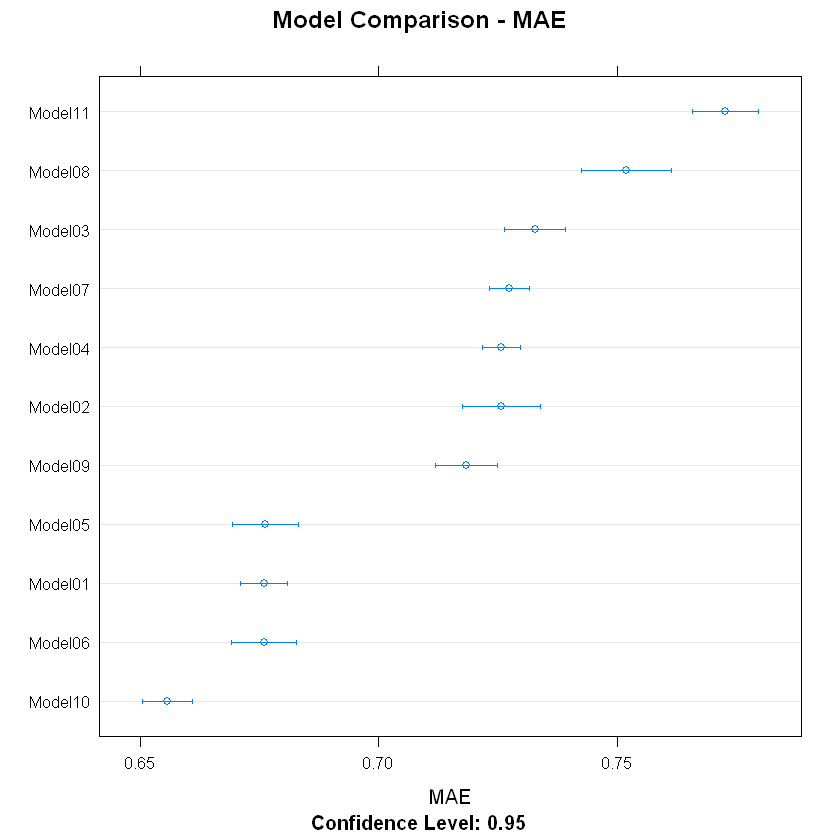

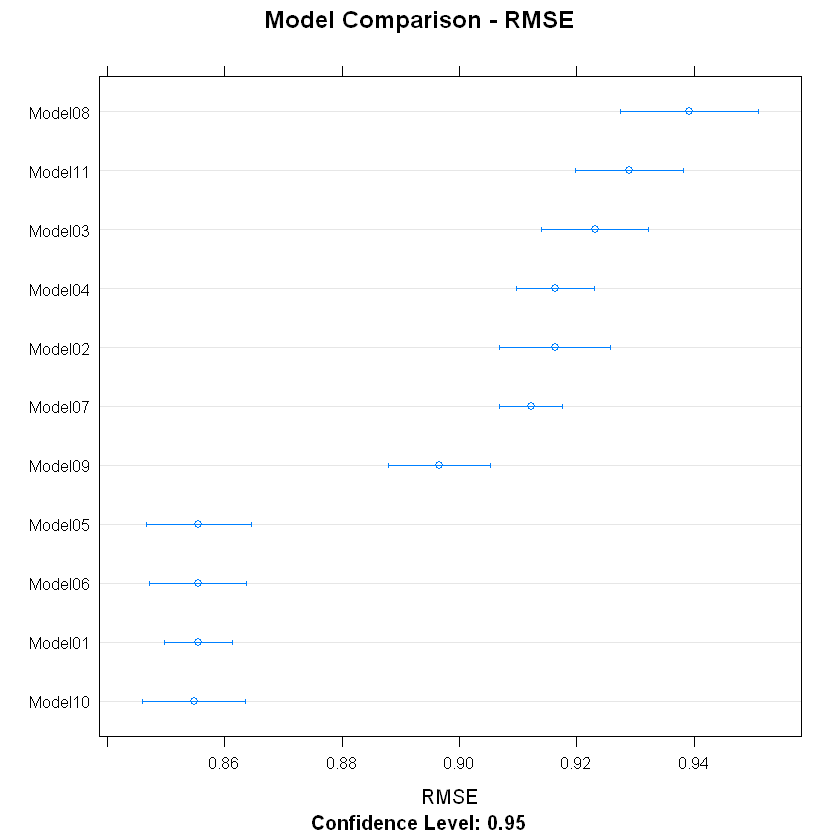

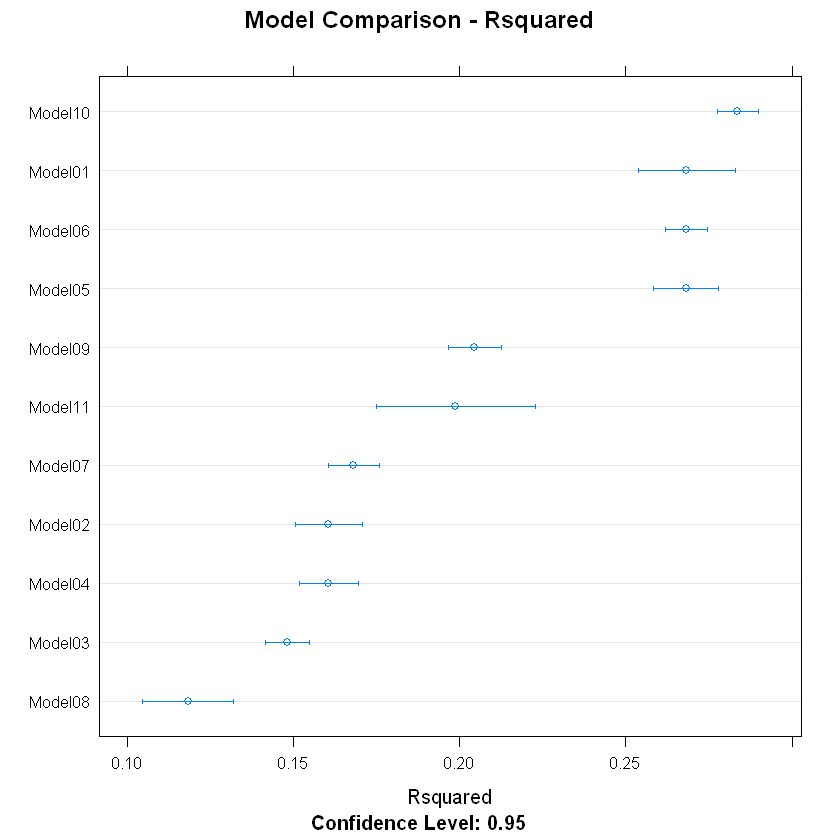

In [36]:
# Load the lattice package for plotting
library(lattice)

# Create the plots using dotplot()
dotplot(results, metric = "MAE", main = "Model Comparison - MAE")
dotplot(results, metric = "RMSE", main = "Model Comparison - RMSE")
dotplot(results, metric = "Rsquared", main = "Model Comparison - Rsquared")

In [31]:
svm_model

Support Vector Machines with Radial Basis Function Kernel 

28407 samples
   38 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 22726, 22725, 22725, 22726, 22726 
Resampling results across tuning parameters:

  C     RMSE       Rsquared   MAE      
  0.25  0.8560191  0.2829559  0.6568465
  0.50  0.8548442  0.2836972  0.6557367
  1.00  0.8575401  0.2793003  0.6578178

Tuning parameter 'sigma' was held constant at a value of 0.007643138
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.007643138 and C = 0.5.

In [38]:
formula <- svm_model$finalModel

In [39]:
formula

Support Vector Machine object of class "ksvm" 

SV type: eps-svr  (regression) 
 parameter : epsilon = 0.1  cost C = 0.5 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.00764313839049542 

Number of Support Vectors : 25314 

Objective Function Value : -7491.023 
Training error : 0.638892 